# Emotional Speech Detection

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Import Dataset

In [2]:
!echo '{"username":"ariffaizin","key":"9c3c17b1c9f2112ceb774af06e41e16c"}' > kaggle.json

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# change permission
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d ejlok1/toronto-emotional-speech-set-tess

toronto-emotional-speech-set-tess.zip: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
import zipfile,os
test_zip = 'toronto-emotional-speech-set-tess.zip'
zip_ref2 = zipfile.ZipFile(test_zip, 'r')
zip_ref2.extractall()
zip_ref2.close()

## Import Module


In [4]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

In [5]:
paths = []
labels = []
for dirname, _, filenames in os.walk('/content/TESS Toronto emotional speech set data'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
    if len(paths) == 2800:
        break
print('Dataset is Loaded')

Dataset is Loaded


In [6]:
len(paths)

2800

In [7]:
paths[:5]

['/content/TESS Toronto emotional speech set data/OAF_Sad/OAF_hire_sad.wav',
 '/content/TESS Toronto emotional speech set data/OAF_Sad/OAF_dead_sad.wav',
 '/content/TESS Toronto emotional speech set data/OAF_Sad/OAF_mood_sad.wav',
 '/content/TESS Toronto emotional speech set data/OAF_Sad/OAF_red_sad.wav',
 '/content/TESS Toronto emotional speech set data/OAF_Sad/OAF_pick_sad.wav']

In [8]:
labels[:5]

['sad', 'sad', 'sad', 'sad', 'sad']

In [9]:
## Create a dataframe
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label
0,/content/TESS Toronto emotional speech set dat...,sad
1,/content/TESS Toronto emotional speech set dat...,sad
2,/content/TESS Toronto emotional speech set dat...,sad
3,/content/TESS Toronto emotional speech set dat...,sad
4,/content/TESS Toronto emotional speech set dat...,sad


In [10]:
df['label'].value_counts()

sad        400
happy      400
fear       400
neutral    400
ps         400
disgust    400
angry      400
Name: label, dtype: int64

## Exploratory Data Analysis

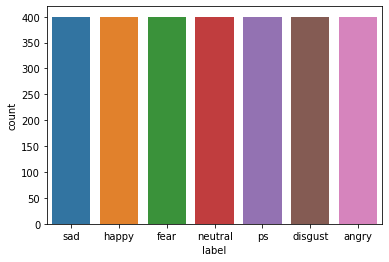

In [11]:
sns.countplot(df['label'])

In [12]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()
    
def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

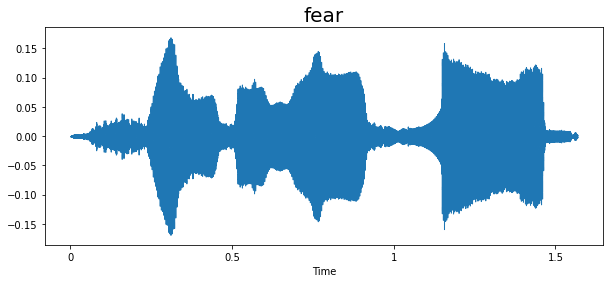

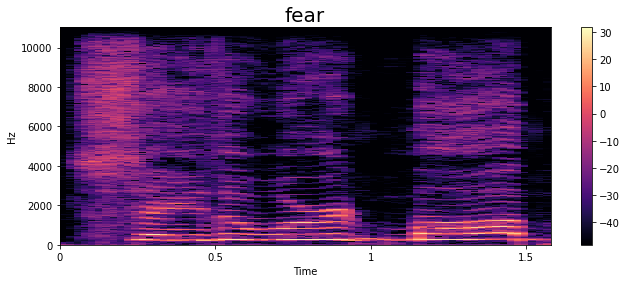

In [13]:
emotion = 'fear'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

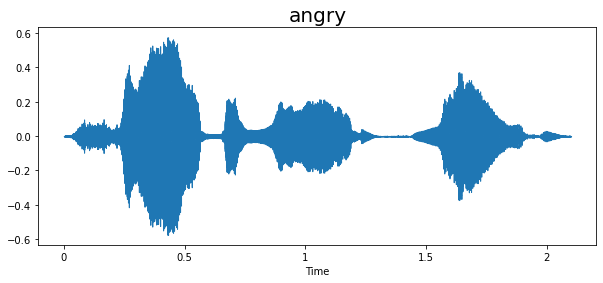

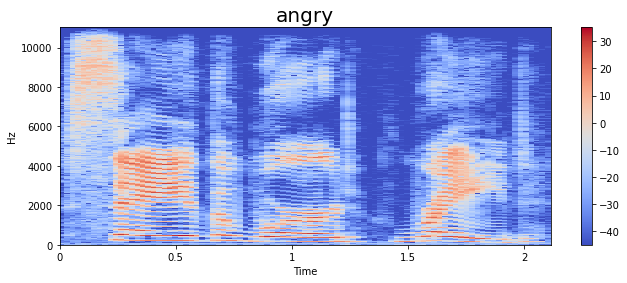

In [14]:
emotion = 'angry'
path = np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

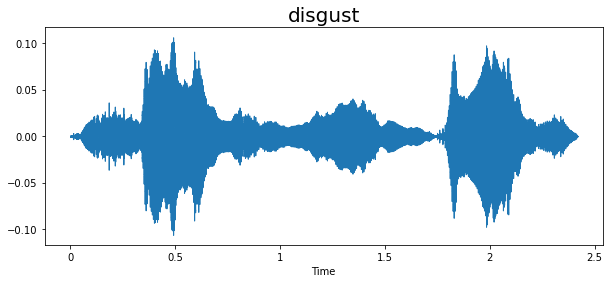

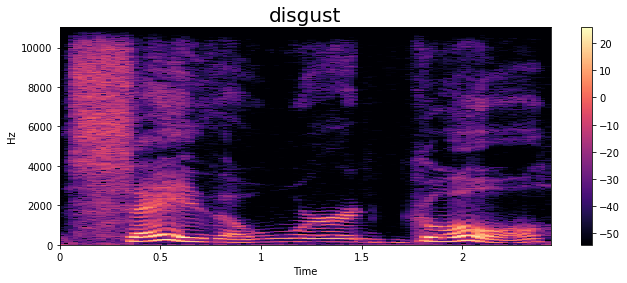

In [15]:
emotion = 'disgust'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

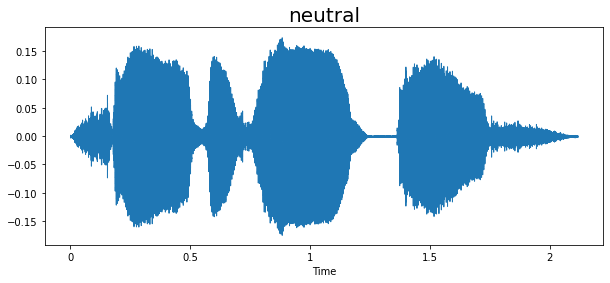

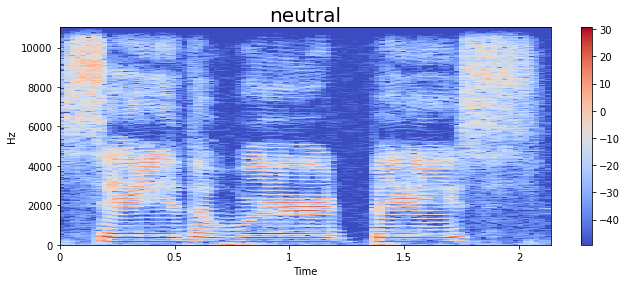

In [16]:
emotion = 'neutral'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

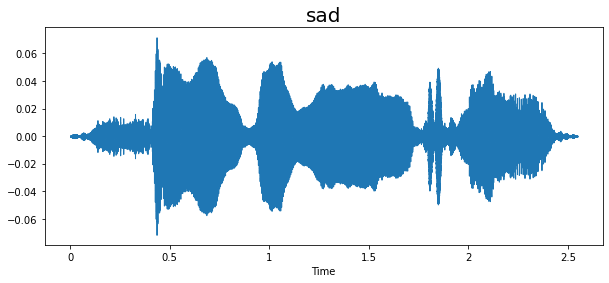

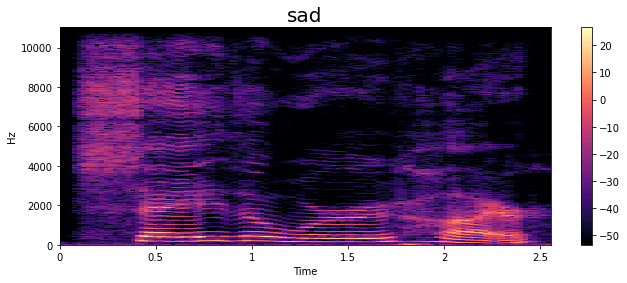

In [17]:
emotion = 'sad'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

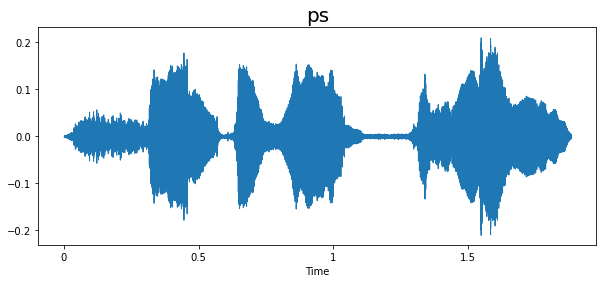

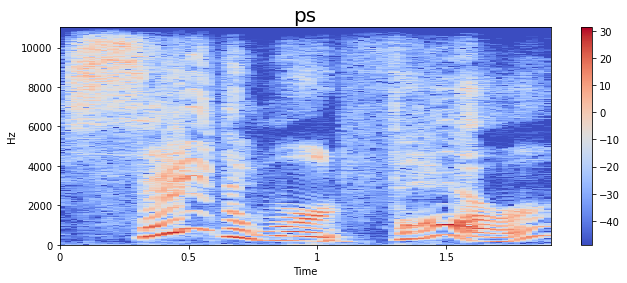

In [18]:
emotion = 'ps'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

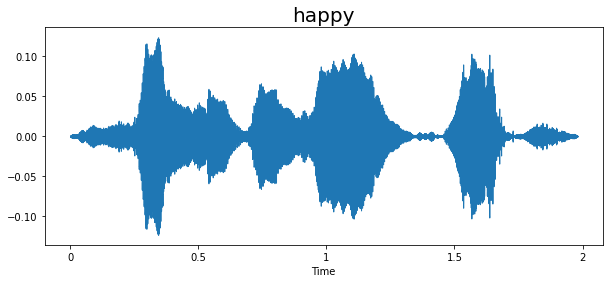

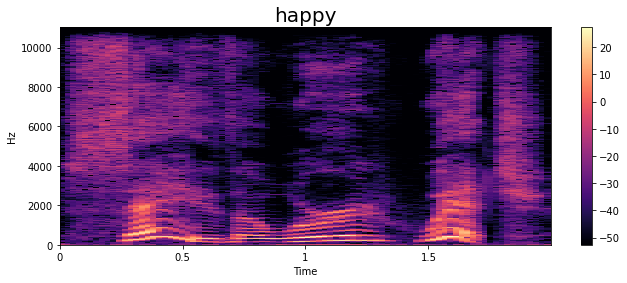

In [19]:
emotion = 'happy'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

## Feature Extraction

In [20]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [21]:
extract_mfcc(df['speech'][0])

array([-4.90027252e+02,  1.19916916e+02,  5.76352358e+00, -5.55616283e+00,
        1.61126366e+01,  1.27437363e+01, -1.58008261e+01, -2.03252506e+01,
       -9.29802132e+00,  3.66989994e+00, -1.42980404e+01,  7.24133015e+00,
       -5.76383924e+00,  5.25792360e+00, -5.09933829e-01, -1.87905180e+00,
       -1.27335429e+00, -2.21257997e+00,  1.19605847e-01, -5.94053459e+00,
        5.34405756e+00, -2.70659328e+00, -6.43919516e+00, -2.54465389e+00,
       -7.11490583e+00,  1.02863503e+00, -4.56021261e+00, -3.32542479e-01,
        2.14414024e+00,  1.10038643e+01,  7.64606619e+00,  1.74942341e+01,
        8.07962036e+00,  5.22730064e+00,  5.31869221e+00,  7.05316925e+00,
        8.38438511e+00,  1.55216198e+01,  1.55634212e+01,  1.53367014e+01],
      dtype=float32)

In [22]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

In [23]:
X_mfcc

0       [-490.02725, 119.916916, 5.7635236, -5.556163,...
1       [-536.159, 94.47503, 33.461735, 13.676854, 25....
2       [-557.4543, 113.43391, 39.992752, 13.309348, 2...
3       [-571.07605, 125.34917, 37.24078, 12.719948, 2...
4       [-541.3158, 86.607666, 27.1174, 16.23974, 20.9...
                              ...                        
2795    [-423.32526, 90.20458, 12.140583, -9.068149, -...
2796    [-438.7717, 85.602325, -6.069194, -22.954659, ...
2797    [-436.74393, 67.01017, -0.6938792, -1.2115012,...
2798    [-383.40414, 41.639652, 5.488546, -5.9239254, ...
2799    [-422.71054, 79.060844, -15.887045, -19.15854,...
Name: speech, Length: 2800, dtype: object

In [24]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(2800, 40)

In [25]:
## input split
X = np.expand_dims(X, -1)
X.shape

(2800, 40, 1)

In [26]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [27]:
y = y.toarray()

In [28]:
y.shape

(2800, 7)

## Create the LSTM Model

In [29]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(256, return_sequences=False, input_shape=(40,1)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(7, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 256)               264192    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 7)                 4

In [30]:
# Train the model
history = model.fit(X, y, validation_split=0.2, epochs=50, batch_size=64)

Epoch 1/50
35/35 [==============================] - 9s 207ms/step - loss: 1.1493 - accuracy: 0.5491 - val_loss: 3.7861 - val_accuracy: 0.0000e+00
Epoch 2/50
35/35 [==============================] - 6s 182ms/step - loss: 0.3301 - accuracy: 0.8795 - val_loss: 2.6116 - val_accuracy: 0.4018
Epoch 3/50
35/35 [==============================] - 6s 183ms/step - loss: 0.2257 - accuracy: 0.9254 - val_loss: 2.9177 - val_accuracy: 0.5250
Epoch 4/50
35/35 [==============================] - 6s 181ms/step - loss: 0.1675 - accuracy: 0.9478 - val_loss: 4.2115 - val_accuracy: 0.3161
Epoch 5/50
35/35 [==============================] - 6s 181ms/step - loss: 0.1250 - accuracy: 0.9647 - val_loss: 3.6332 - val_accuracy: 0.4500
Epoch 6/50
35/35 [==============================] - 6s 180ms/step - loss: 0.1381 - accuracy: 0.9571 - val_loss: 3.1255 - val_accuracy: 0.2964
Epoch 7/50
35/35 [==============================] - 6s 182ms/step - loss: 0.1064 - accuracy: 0.9607 - val_loss: 4.7299 - val_accuracy: 0.3339
Ep

In [31]:
# best val accuracy: 72.32
# use checkpoint to save the best val accuracy model
# adjust learning rate for slow convergence

## Plot the result

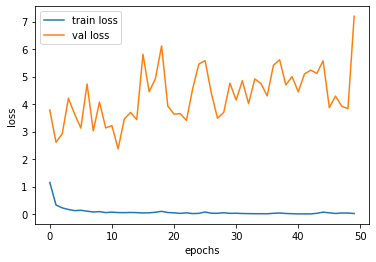

In [32]:
epochs = list(range(50))
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

## Export to SavedModel

In [33]:
# import pathlib

# # Export the SavedModel
# export_dir = '/tmp/saved_model'
# tf.saved_model.save(model, export_dir)

# # Convert the model
# converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
# tflite_model = converter.convert()

# # Save the model
# tflite_model_file = pathlib.Path('/tmp/model.tflite')
# tflite_model_file.write_bytes(tflite_model)

In [34]:
import tempfile

MODEL_DIR = os.path.join(tempfile.gettempdir(), "saved_model")
version = 1
export_path = os.path.join(MODEL_DIR, str(version))
print('export_path = {}\n'.format(export_path))

if os.path.isdir(export_path):
    print('\nAlready saved a model, cleaning up\n')
    !rm -r {export_path}
    
tf.keras.models.save_model(
    model,
    export_path,
    overwrite=True,
    include_optimizer=True,
    save_format=None,
    signatures=None,
    options=None
)

print('\nSaved model:')
!ls -l {export_path}

export_path = /tmp/saved_model/1


Already saved a model, cleaning up



INFO:tensorflow:Assets written to: /tmp/saved_model/1/assets


INFO:tensorflow:Assets written to: /tmp/saved_model/1/assets



Saved model:
total 820
drwxr-xr-x 2 root root   4096 Jun  5 14:27 assets
-rw-r--r-- 1 root root  14963 Jun  5 14:27 keras_metadata.pb
-rw-r--r-- 1 root root 812769 Jun  5 14:27 saved_model.pb
drwxr-xr-x 2 root root   4096 Jun  5 14:27 variables


In [35]:
!saved_model_cli show --dir {export_path} --all


MetaGraphDef with tag-set: 'serve' contains the following SignatureDefs:

signature_def['__saved_model_init_op']:
  The given SavedModel SignatureDef contains the following input(s):
  The given SavedModel SignatureDef contains the following output(s):
    outputs['__saved_model_init_op'] tensor_info:
        dtype: DT_INVALID
        shape: unknown_rank
        name: NoOp
  Method name is: 

signature_def['serving_default']:
  The given SavedModel SignatureDef contains the following input(s):
    inputs['lstm_input'] tensor_info:
        dtype: DT_FLOAT
        shape: (-1, 40, 1)
        name: serving_default_lstm_input:0
  The given SavedModel SignatureDef contains the following output(s):
    outputs['dense_2'] tensor_info:
        dtype: DT_FLOAT
        shape: (-1, 7)
        name: StatefulPartitionedCall:0
  Method name is: tensorflow/serving/predict

Concrete Functions:
  Function Name: '__call__'
    Option #1
      Callable with:
        Argument #1
          inputs: TensorSp

In [36]:
import sys
# We need sudo prefix if not on a Google Colab.
if 'google.colab' not in sys.modules:
  SUDO_IF_NEEDED = 'sudo'
else:
  SUDO_IF_NEEDED = ''

In [37]:
# This is the same as you would do from your command line, but without the [arch=amd64], and no sudo
# You would instead do:
# echo "deb [arch=amd64] http://storage.googleapis.com/tensorflow-serving-apt stable tensorflow-model-server tensorflow-model-server-universal" | sudo tee /etc/apt/sources.list.d/tensorflow-serving.list && \
# curl https://storage.googleapis.com/tensorflow-serving-apt/tensorflow-serving.release.pub.gpg | sudo apt-key add -

!echo "deb http://storage.googleapis.com/tensorflow-serving-apt stable tensorflow-model-server tensorflow-model-server-universal" | {SUDO_IF_NEEDED} tee /etc/apt/sources.list.d/tensorflow-serving.list && \
curl https://storage.googleapis.com/tensorflow-serving-apt/tensorflow-serving.release.pub.gpg | {SUDO_IF_NEEDED} apt-key add -
!{SUDO_IF_NEEDED} apt update

!{SUDO_IF_NEEDED} apt-get install tensorflow-model-server

deb http://storage.googleapis.com/tensorflow-serving-apt stable tensorflow-model-server tensorflow-model-server-universal
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2943  100  2943    0     0   151k      0 --:--:-- --:--:-- --:--:--  151k
OK
Hit:1 http://storage.googleapis.com/tensorflow-serving-apt stable InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:3 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:6 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:8 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic 

In [38]:
os.environ["MODEL_DIR"] = MODEL_DIR
print(MODEL_DIR)

!nohup tensorflow_model_server \
  --rest_api_port=8501 \
  --model_name=emotion_model \
  --model_base_path="{MODEL_DIR}" >server.log 2>&1

!tail server.log

/tmp/saved_model
s
tututtu
^C
nohup: ignoring input
[warn] getaddrinfo: address family for nodename not supported
[evhttp_server.cc : 245] NET_LOG: Entering the event loop ...
